In [2]:
# 1. Imports
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

In [3]:
# Download dataset
nltk.download("movie_reviews")
from nltk.corpus import movie_reviews

# 2. Load dataset
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

df = pd.DataFrame(docs, columns=["review", "label"])
print(df.head())

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\aajay\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


                                              review label
0  plot : two teen couples go to a church party ,...   neg
1  the happy bastard's quick movie review \ndamn ...   neg
2  it is movies like these that make a jaded movi...   neg
3   " quest for camelot " is warner bros . ' firs...   neg
4  synopsis : a mentally unstable man undergoing ...   neg


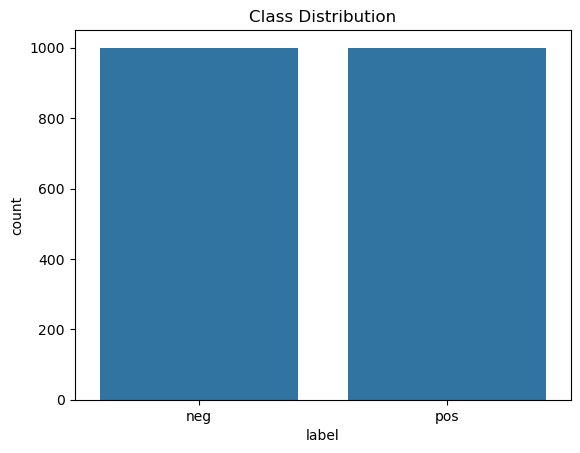

In [4]:
# 3. EDA
sns.countplot(x="label", data=df)
plt.title("Class Distribution")
plt.show()

In [5]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df["review"], df["label"], test_size=0.2, stratify=df["label"], random_state=42
)

In [6]:
# 5. Vectorization
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [7]:
# 6. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

=== Logistic Regression Report ===
              precision    recall  f1-score   support

         neg       0.85      0.80      0.82       200
         pos       0.81      0.86      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [8]:
# 7. Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

=== Random Forest Report ===
              precision    recall  f1-score   support

         neg       0.79      0.90      0.84       200
         pos       0.88      0.76      0.82       200

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [9]:
# Encode labels (neg -> 0, pos -> 1)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)


In [10]:
# 8. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train_tfidf, y_train_enc)
y_pred_xgb = xgb.predict(X_test_tfidf)

print("=== XGBoost Report ===")
print(classification_report(y_test_enc, y_pred_xgb, target_names=le.classes_))

c:\Users\aajay\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:37:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Report ===
              precision    recall  f1-score   support

         neg       0.82      0.83      0.83       200
         pos       0.83      0.82      0.83       200

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [11]:
# 9. Save Model + Vectorizer
joblib.dump(lr, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print(" Model and vectorizer saved successfully!")


 Model and vectorizer saved successfully!
